In [45]:
# Deep diving into stressed cell states (Hypoxic, ER,inflammatory)
er_stress_genes=['ATF4','DDIT3','XBP1','HSPA5','HSP90B1','HERPUD1','DNAJB9','STC2','ASNS']
hypoxia_stress_gene=['GDF15','PDK4','SLC2A1','LDHA','VEGFA','BNIP3','NDRG1']
infl_stress_genes=['JUN','FOS','FOSB','IL6','NFKBIA','TNFAIP3','CXCL8']


In [72]:
sc.tl.score_genes(adata,er_stress_genes,score_name='stress_er')
sc.tl.score_genes(adata,hypoxia_stress_gene,score_name='stress_hypoxia')
sc.tl.score_genes(adata,infl_stress_genes,score_name='stress_inflm')


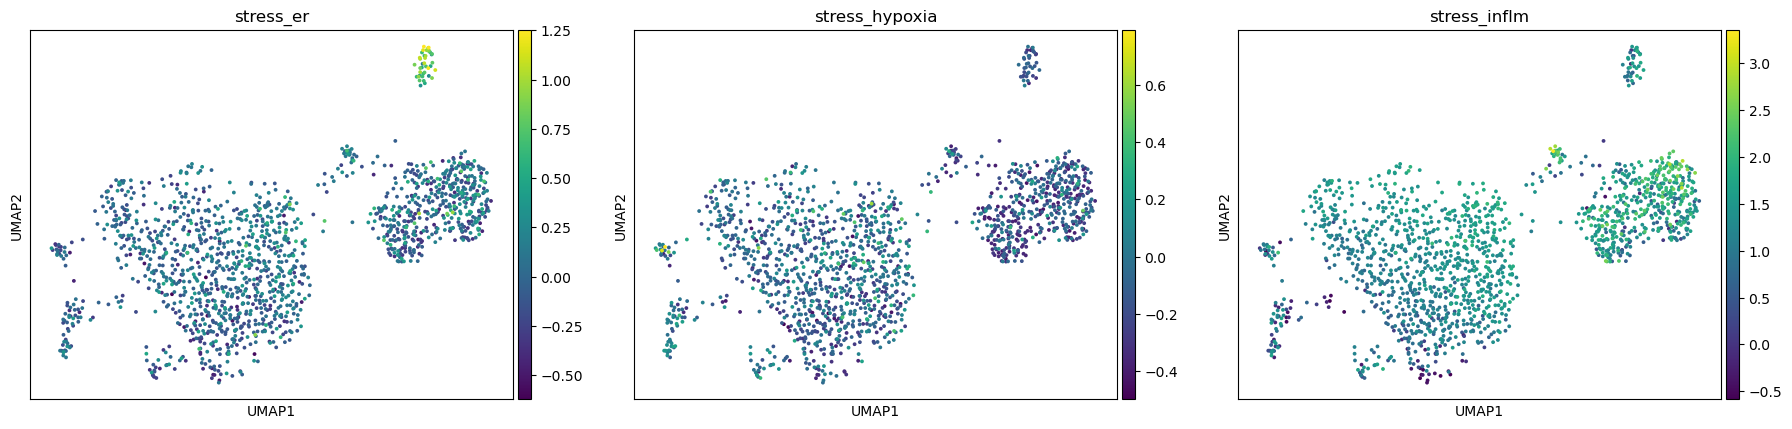

In [75]:
sc.pl.umap(adata,color=['stress_er','stress_hypoxia','stress_inflm'],cmap='viridis',size=30)

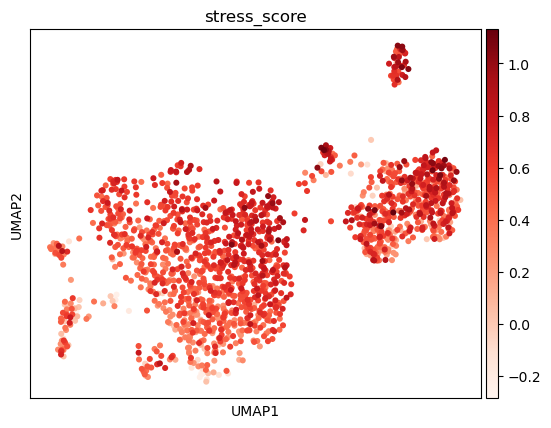

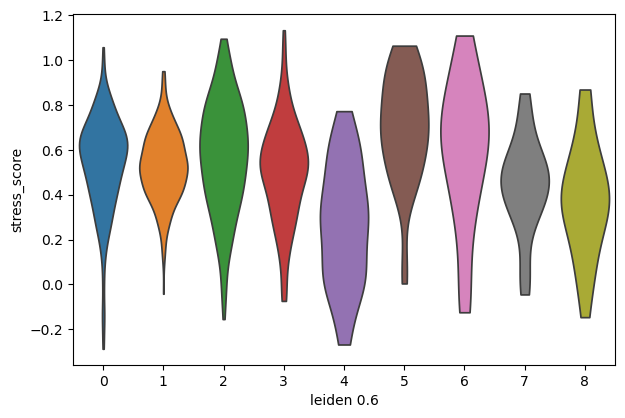

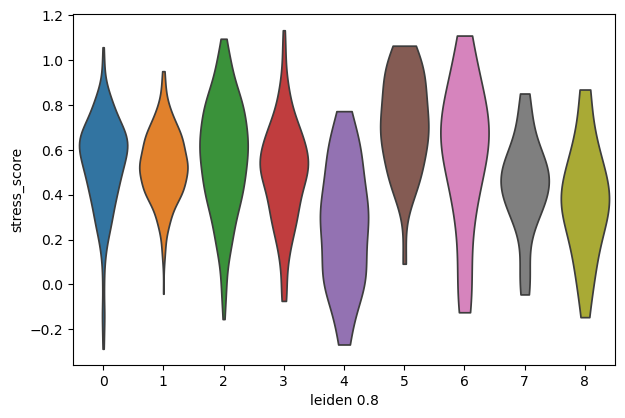

In [77]:
#comparing stress scores wrt stress genes across clusters
stress_genes = er_stress_genes+hypoxia_stress_gene+infl_stress_genes
sc.tl.score_genes(adata, stress_genes, score_name='stress_score')
sc.pl.umap(adata, color='stress_score',cmap='Reds')
sc.pl.violin(adata,'stress_score',groupby='leiden_0.6',stripplot=False)
sc.pl.violin(adata,'stress_score',groupby='leiden_0.8',stripplot=False)


In [78]:
#identifying cell stress across cell types:
adata.obs['stress_high'] = adata.obs['stress_score'] > adata.obs['stress_score'].quantile(0.75)
adata.obs['stress_high']=adata.obs['stress_high'].astype('category')


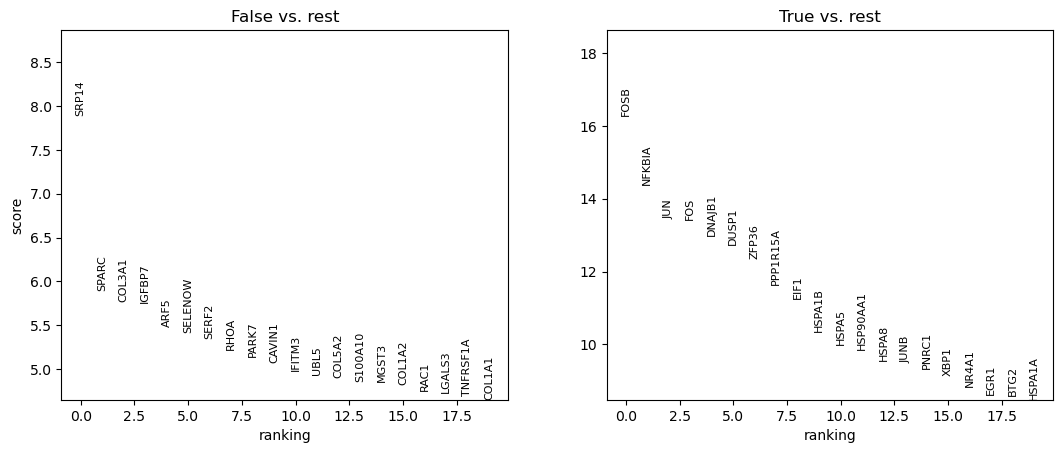

In [79]:
#Validation of genes upregulated in stressed states/Differential expression analysis of high stress cells
sc.tl.rank_genes_groups(adata, 'stress_high', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

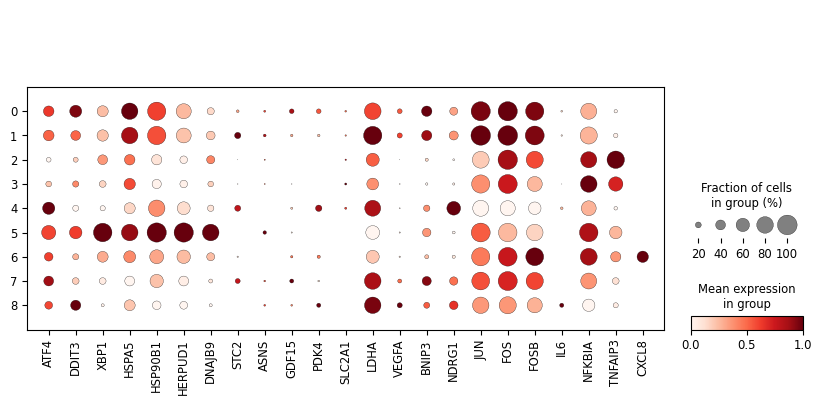

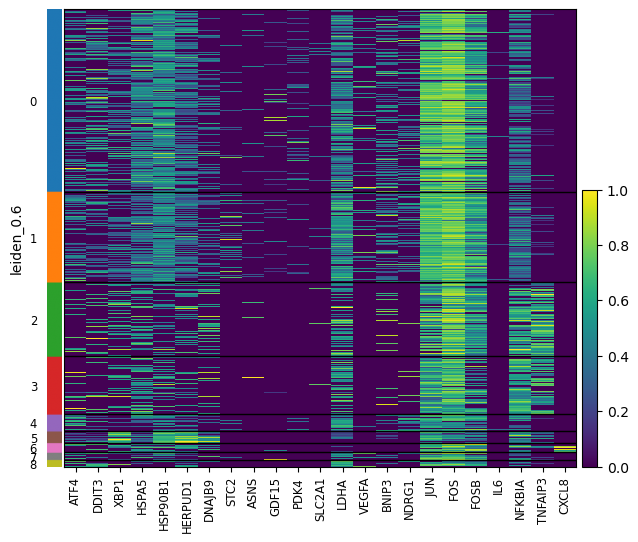

In [81]:
sc.pl.dotplot(adata,var_names=stress_genes,groupby='leiden_0.6',standard_scale='var')
sc.pl.heatmap(adata,var_names=stress_genes,groupby='leiden_0.6',standard_scale='var')

In [83]:

adata.obs['cell_type']

AAACCTGAGACTAGAT-1                   Fibroblasts
AAACCTGAGATGGCGT-1                       T cells
AAACCTGCATAGAAAC-1                       T cells
AAACCTGGTACGAAAT-1    Stellate / Fibroblast-like
AAACCTGGTCACCTAA-1        Cytotoxic T / NK cells
                                 ...            
TTTGGTTCATGCGCAC-1                   Fibroblasts
TTTGGTTTCATCATTC-1    Stellate / Fibroblast-like
TTTGTCAAGTGAAGAG-1                   Fibroblasts
TTTGTCAGTCTGATTG-1                       T cells
TTTGTCATCGCGGATC-1    Stellate / Fibroblast-like
Name: cell_type, Length: 1574, dtype: category
Categories (9, object): ['Fibroblasts', 'Stellate / Fibroblast-like', 'T cells', 'Cytotoxic T / NK cells', ..., 'Plasma cells', 'Dendritic / Macrophages', 'Basal epithelial cells', 'Pericytes']

In [84]:
adata.obs['stress_score']

AAACCTGAGACTAGAT-1    0.602675
AAACCTGAGATGGCGT-1    0.581755
AAACCTGCATAGAAAC-1    0.200704
AAACCTGGTACGAAAT-1    0.629183
AAACCTGGTCACCTAA-1    1.071749
                        ...   
TTTGGTTCATGCGCAC-1    0.765093
TTTGGTTTCATCATTC-1    0.270435
TTTGTCAAGTGAAGAG-1    0.573710
TTTGTCAGTCTGATTG-1    0.265633
TTTGTCATCGCGGATC-1    0.785863
Name: stress_score, Length: 1574, dtype: float64

In [85]:
#average stress score percluster
stress_by_celltype = adata.obs.groupby('cell_type')['stress_score'].mean().sort_values(ascending=False)
print(stress_by_celltype)


cell_type
Plasma cells                  0.701596
Dendritic / Macrophages       0.591214
T cells                       0.568545
Fibroblasts                   0.538227
Stellate / Fibroblast-like    0.528433
Cytotoxic T / NK cells        0.503224
Basal epithelial cells        0.441880
Pericytes                     0.376645
Endothelial cells             0.265455
Name: stress_score, dtype: float64


C:\Users\faizm\AppData\Local\Temp\ipykernel_24032\4240544590.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_by_celltype = adata.obs.groupby('cell_type')['stress_score'].mean().sort_values(ascending=False)


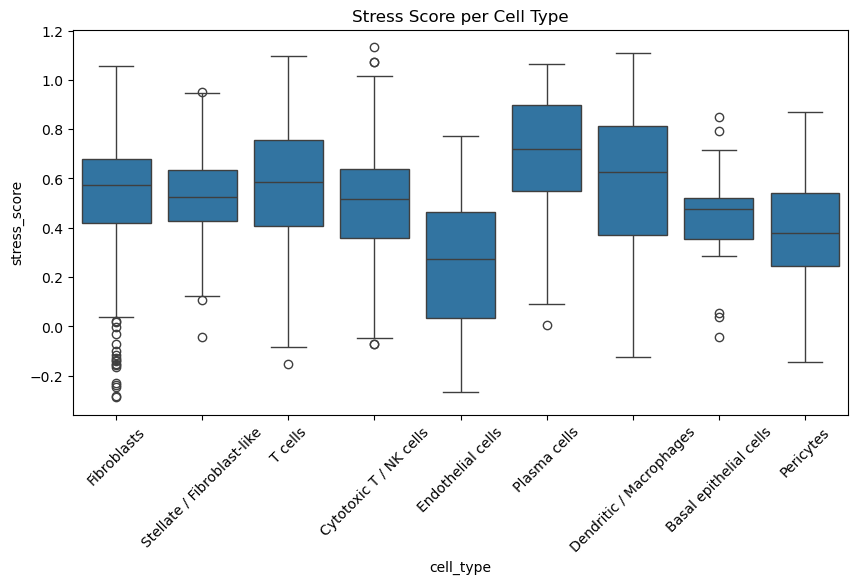

In [86]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cell_type', y='stress_score', data=adata.obs)
plt.xticks(rotation=45)
plt.title('Stress Score per Cell Type')
plt.show()

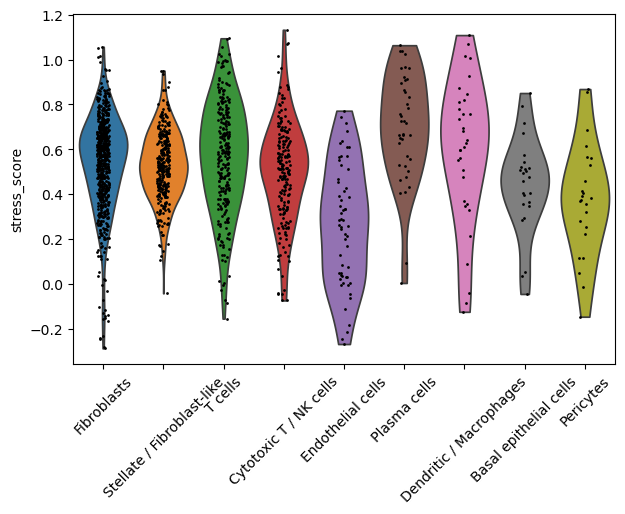

In [87]:
sc.pl.violin(adata, keys='stress_score', groupby='cell_type', rotation=45, size=2)


In [90]:
pathways = ['stress_score','stress_er','stress_hypoxia','stress_inflm']
for pw in pathways:
    print(adata.obs.groupby('cell_type')[pw].mean().sort_values(ascending=False))


cell_type
Plasma cells                  0.701596
Dendritic / Macrophages       0.591214
T cells                       0.568545
Fibroblasts                   0.538227
Stellate / Fibroblast-like    0.528433
Cytotoxic T / NK cells        0.503224
Basal epithelial cells        0.441880
Pericytes                     0.376645
Endothelial cells             0.265455
Name: stress_score, dtype: float64
cell_type
Plasma cells                  0.755996
Dendritic / Macrophages       0.088545
T cells                       0.052275
Fibroblasts                   0.038214
Stellate / Fibroblast-like    0.006722
Cytotoxic T / NK cells       -0.002183
Endothelial cells            -0.026134
Pericytes                    -0.091440
Basal epithelial cells       -0.105873
Name: stress_er, dtype: float64
cell_type
Pericytes                     0.072216
Basal epithelial cells        0.005047
Endothelial cells            -0.011136
Stellate / Fibroblast-like   -0.065399
Fibroblasts                  -0.071287
Plasma

C:\Users\faizm\AppData\Local\Temp\ipykernel_24032\3258425779.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(adata.obs.groupby('cell_type')[pw].mean().sort_values(ascending=False))


In [91]:
stress_by_celltype = adata.obs.groupby('cell_type')['stress_score'].mean().sort_values(ascending=False)
print(stress_by_celltype)

top_celltype = stress_by_celltype.index[0]
top_score = stress_by_celltype.iloc[0]

print(f"\nCell type with highest stress: {top_celltype} (average score = {top_score:.3f})")


cell_type
Plasma cells                  0.701596
Dendritic / Macrophages       0.591214
T cells                       0.568545
Fibroblasts                   0.538227
Stellate / Fibroblast-like    0.528433
Cytotoxic T / NK cells        0.503224
Basal epithelial cells        0.441880
Pericytes                     0.376645
Endothelial cells             0.265455
Name: stress_score, dtype: float64

Cell type with highest stress: Plasma cells (average score = 0.702)


C:\Users\faizm\AppData\Local\Temp\ipykernel_24032\2578351346.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_by_celltype = adata.obs.groupby('cell_type')['stress_score'].mean().sort_values(ascending=False)


In [92]:

# 1. Calculate mean stress score per cluster
stress_by_cluster = adata.obs.groupby('leiden_0.6')['stress_score'].mean()

# 2. Sort descending to find cluster with max stress
stress_by_cluster_sorted = stress_by_cluster.sort_values(ascending=False)

print("Average stress score per cluster:")
print(stress_by_cluster_sorted)

# 3. Identify the cluster with maximum stress
max_stress_cluster = stress_by_cluster_sorted.index[0]
max_stress_value = stress_by_cluster_sorted.iloc[0]

print(f"\nCluster with highest stress genes: {max_stress_cluster} (average score = {max_stress_value:.3f})")


Average stress score per cluster:
leiden_0.6
5    0.701596
6    0.591214
2    0.568545
0    0.538227
1    0.528433
3    0.503224
7    0.441880
8    0.376645
4    0.265455
Name: stress_score, dtype: float64

Cluster with highest stress genes: 5 (average score = 0.702)


C:\Users\faizm\AppData\Local\Temp\ipykernel_24032\3283838194.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_by_cluster = adata.obs.groupby('leiden_0.6')['stress_score'].mean()
